## 1) Heuristic

### 1. Greedy Matching Based on Degree

In [24]:
import networkx as nx
import random

def greedy_matching_based_on_degree(graph):
    nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    matched = set()
    matching = []

    for node, _ in nodes:
        if node not in matched:
            for neighbor in graph.neighbors(node):
                if neighbor not in matched:
                    matching.append((node, neighbor))
                    matched.add(node)
                    matched.add(neighbor)
                    break

    return matching

### 2. Random Matching

In [25]:
def random_matching(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    matched = set()
    matching = []

    for node in nodes:
        if node not in matched:
            for neighbor in graph.neighbors(node):
                if neighbor not in matched:
                    matching.append((node, neighbor))
                    matched.add(node)
                    matched.add(neighbor)
                    break

    return matching

## 2) Verification of Matchings

In [26]:
def test_matching(graph, matching):
    matched_nodes = set()
    for u, v in matching:
        assert u in graph
        assert v in graph
        assert (u, v) in graph.edges or (v, u) in graph.edges
        assert u not in matched_nodes
        assert v not in matched_nodes
        matched_nodes.add(u)
        matched_nodes.add(v)
    print("All matchings are correct")

# Example test
graph = nx.gnp_random_graph(120, 0.04)
matching = greedy_matching_based_on_degree(graph)
test_matching(graph, matching)

matching = random_matching(graph)
test_matching(graph, matching)

All matchings are correct
All matchings are correct


## 3) Comparison of Heuristics
We will statistically compare the two heuristics based on:

* The size of the returned matching.
* The computation time.

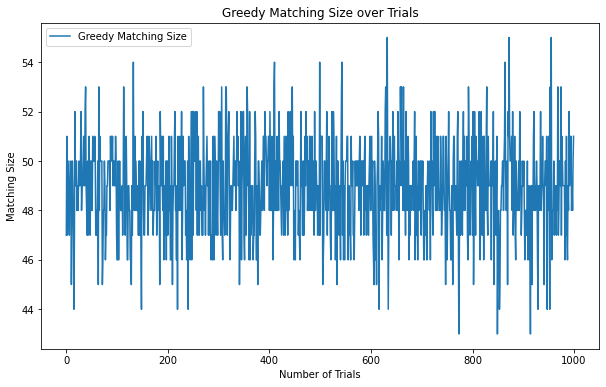

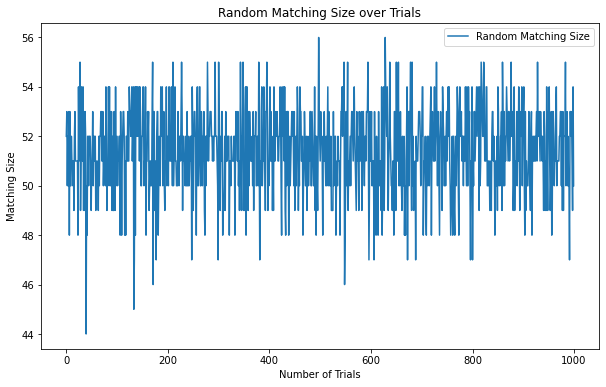

In [27]:
import time
import matplotlib.pyplot as plt

def compare_heuristics(trials=1000, n=120, p=0.04):
    greedy_sizes = []
    random_sizes = []
    greedy_times = []
    random_times = []

    for _ in range(trials):
        graph = nx.gnp_random_graph(n, p)

        start_time = time.time()
        matching = greedy_matching_based_on_degree(graph)
        greedy_times.append(time.time() - start_time)
        greedy_sizes.append(len(matching))

        start_time = time.time()
        matching = random_matching(graph)
        random_times.append(time.time() - start_time)
        random_sizes.append(len(matching))

    # Plot for Greedy Matching
    plt.figure(figsize=(10, 6))
    plt.plot(range(trials), greedy_sizes, label='Greedy Matching Size')
    plt.xlabel('Number of Trials')
    plt.ylabel('Matching Size')
    plt.title('Greedy Matching Size over Trials')
    plt.legend()
    plt.show()

    # Plot for Random Matching
    plt.figure(figsize=(10, 6))
    plt.plot(range(trials), random_sizes, label='Random Matching Size')
    plt.xlabel('Number of Trials')
    plt.ylabel('Matching Size')
    plt.title('Random Matching Size over Trials')
    plt.legend()
    plt.show()


compare_heuristics()

## 4) Polynomial Time Proof

Both heuristics must be proven to run in polynomial time. We analyze their complexities as follows:

* Greedy Matching Based on Degree:
    * Sorting nodes by degree: O(nlogn)
    * Iterating over nodes and their neighbors: O(n+m), where n is the number of nodes and m is the number of edges.
    * Overall complexity: O(nlogn+n+m)=O(nlogn+m)

* Random Matching:
    * Shuffling nodes: O(n)
    * Iterating over nodes and their neighbors: O(n+m)
    * Overall complexity: O(n+m)